In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv(r"C:\Users\drjun\OneDrive\Documents\hospital_readmissions.csv")


In [3]:
# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Get an overview of the dataset
print(data.info())

# Get statistical summary of numerical features
print(data.describe())

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column 'readmitted' (yes = 1, no = 0)
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)

# Apply Label Encoding to binary columns
binary_cols = ['glucose_test', 'A1Ctest', 'change', 'diabetes_med']

le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# Apply One-Hot Encoding to categorical columns with more than 2 categories
data = pd.get_dummies(data, columns=['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], drop_first=True)

# Check the new structure of the dataset
print(data.head())


   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency  glucose_test  A1Ctest  change  ...  \
0             2            0            0             1        1       0  ...   
1             0            0            0             1        1       0  ...   
2             0            0            0             1        1       1  ...   
3             1            0            0             1        1       1  ...   
4             0            0            0             1        1       0  ...   

   diag_2_Musculoskeletal  diag_2_Other  diag_2_Respiratory  diag_3_Diabetes  \
0           

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
data[num_cols] = scaler.fit_transform(data[num_cols])

# Display the dataset after scaling
print(data.head())


   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0          1.181671          1.451151     -0.205440       0.216814   
1         -0.484212         -0.466276      0.377601      -0.403505   
2          0.182141          0.088769     -0.788481       0.216814   
3         -0.817389         -0.365359     -0.788481      -0.527569   
4         -1.150566         -0.062607     -0.788481      -1.147888   

   n_outpatient  n_inpatient  n_emergency  glucose_test  A1Ctest  change  ...  \
0      1.366510    -0.522918    -0.210644             1        1       0  ...   
1     -0.306494    -0.522918    -0.210644             1        1       0  ...   
2     -0.306494    -0.522918    -0.210644             1        1       1  ...   
3      0.530008    -0.522918    -0.210644             1        1       1  ...   
4     -0.306494    -0.522918    -0.210644             1        1       0  ...   

   diag_2_Musculoskeletal  diag_2_Other  diag_2_Respiratory  diag_3_Diabetes  \
0           

In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (17500, 43)
Testing data shape: (7500, 43)


In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.61
Precision: 0.62
Recall: 0.41
F1 Score: 0.49


# Few Visulaizations for Better Understanding 

### 1. Confusion Matrix Visualization
This will help visually represent the performance of Logistic Regression model in terms of true positives, true negatives, false positives, and false negatives.

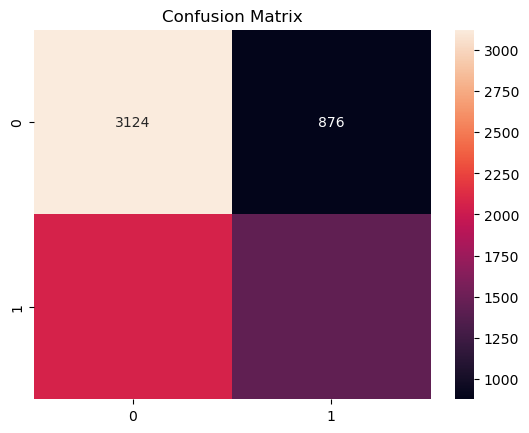

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()


### 2. Feature Importance Visualization
This will show which features have the most impact on the model's predictions.

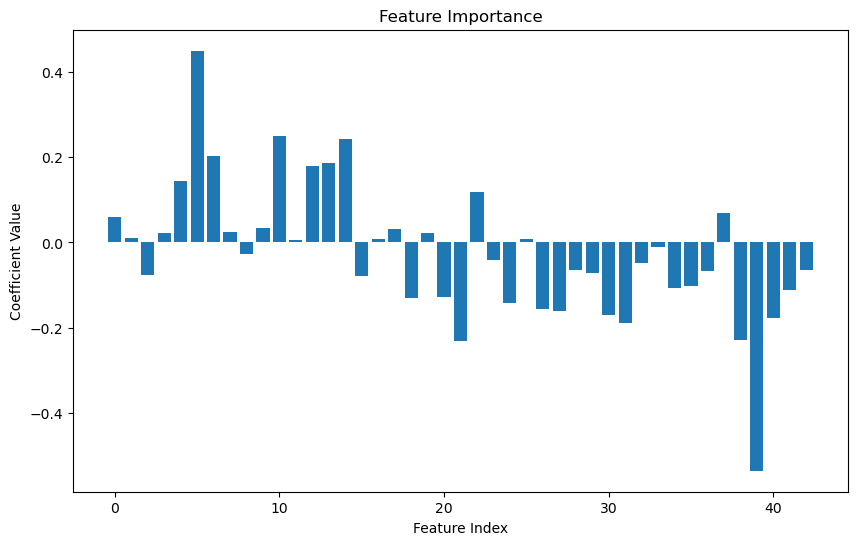

Feature: time_in_hospital, Coefficient: 0.059759729765268825
Feature: n_lab_procedures, Coefficient: 0.011709410619934536
Feature: n_procedures, Coefficient: -0.07634518727888327
Feature: n_medications, Coefficient: 0.022632306807620687
Feature: n_outpatient, Coefficient: 0.1442261708839985
Feature: n_inpatient, Coefficient: 0.45021934693205584
Feature: n_emergency, Coefficient: 0.20340446079327282
Feature: glucose_test, Coefficient: 0.024060401744754323
Feature: A1Ctest, Coefficient: -0.026081112029008802
Feature: change, Coefficient: 0.03506778357453653
Feature: diabetes_med, Coefficient: 0.25030593256035677
Feature: age_[50-60), Coefficient: 0.006112636576388617
Feature: age_[60-70), Coefficient: 0.17872074505288718
Feature: age_[70-80), Coefficient: 0.18742988915183464
Feature: age_[80-90), Coefficient: 0.24283758917775997
Feature: age_[90-100), Coefficient: -0.07775487252313605
Feature: medical_specialty_Emergency/Trauma, Coefficient: 0.008784732921078559
Feature: medical_specialt

In [15]:
# Extracting feature importance from the Logistic Regression model
importance = model.coef_[0]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

# maping these indices back to feature names:
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Coefficient: {v}")


### 3. Checking Imbalance in the Target Variable
To check if the dataset is imbalanced in terms of the readmission column.

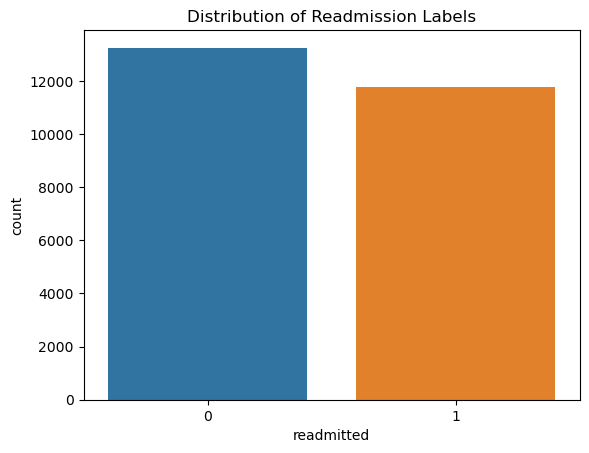

In [12]:
# Checking the distribution of the target variable
sns.countplot(x='readmitted', data=data)
plt.title('Distribution of Readmission Labels')
plt.show()


### 4. Precision-Recall Curve
Since healthcare predictions often prioritize recall, A Precision-Recall curve can better explain the model’s performance on imbalanced data.

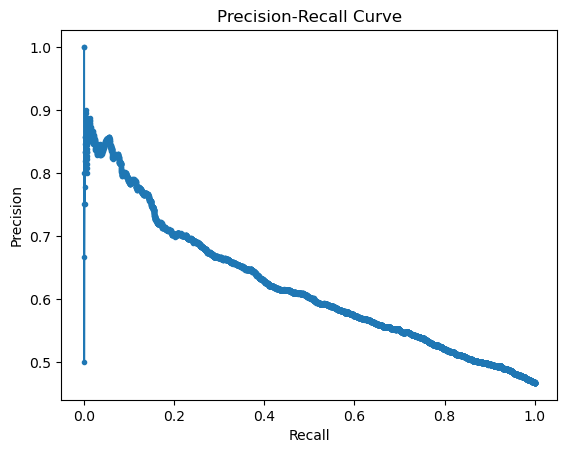

In [14]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plotting precision-recall curve
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
